<a href="https://colab.research.google.com/github/Sim98B/MushroomVision/blob/main/MushD4/MushDetector4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:

# Importing main libraries
try:
  import torch
  print(f"torch: {torch.__version__}")
  import torchvision
  print(f"torchvision: {torchvision.__version__}")
  import torchinfo
  print(f"torchinfo: {torchinfo.__version__}")
except:
  print("[INFO] Torch and Torchvision not installed, downloading")
  !pip install -q torch torchvision torchinfo
  import torch
  import torchvision
  import torchinfo

# Utilities
import os
from pathlib import Path
import requests
import shutil
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

# Manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Neural networks
from torch import nn
from torchvision import transforms
import torchvision.models
from torchinfo import summary

# Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Cloning GitHub repository
!git clone https://github.com/Sim98B/MushroomVision
!mv MushroomVision/Modules/Libraries .

# Custom functions
from Libraries import data, extractors, model_ops, utils

shutil.rmtree("MushroomVision")

torch: 2.1.0+cu118
torchvision: 0.16.0+cu118
torchinfo: 1.8.0
Cloning into 'MushroomVision'...
remote: Enumerating objects: 3789, done.
remote: Counting objects: 100% (534/534), done.
remote: Compressing objects: 100% (289/289), done.
remote: Total 3789 (delta 255), reused 470 (delta 214), pack-reused 3255
Receiving objects: 100% (3789/3789), 580.52 MiB | 35.81 MiB/s, done.
Resolving deltas: 100% (944/944), done.
Updating files: 100% (1739/1739), done.
mv: cannot move 'MushroomVision/Modules/Libraries' to './Libraries': Directory not empty


In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [8]:
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True)

trainset

100%|██████████| 169001437/169001437 [00:03<00:00, 44486112.26it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ./data
    Split: Train

Files already downloaded and verified


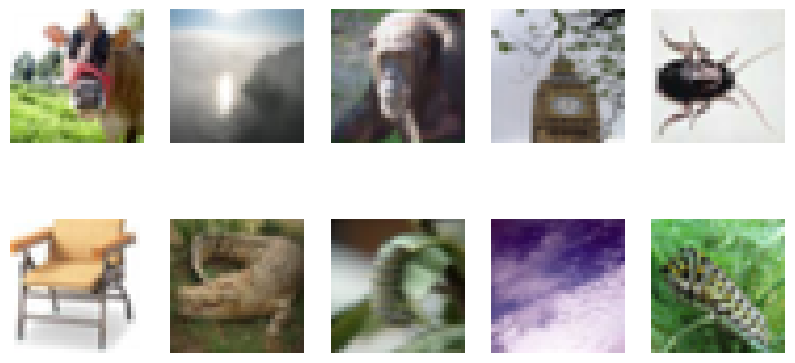

In [20]:
import torchvision
import matplotlib.pyplot as plt

# Carica il dataset CIFAR-100
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True)

# Definisci le classi o sottoclassi associate ai funghi (questo è solo un esempio)
classi_funghi = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

# Filtra le immagini relative ai funghi
funghi_images = [img for img, label in trainset if label in classi_funghi]

# Visualizza alcune delle immagini
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(funghi_images[i])
    plt.axis('off')

plt.show()
